# Superstore Data Analysis 
### Today I am going to work on Superstore dataset. Analyse the data by **R** and get some usefull insights about the data.

#### firstly set up the working directory

In [ ]:
# to see the current working directory
getwd()

##### now let jump in the pull off data 

In [ ]:
# importing the data -- I will always take the master dataset in variable = ** x **
x <- read.csv("superstore.csv")

In [ ]:
# View(x)

## Explore the data 
#### understand the data and minor cleaning 

##### before analysis or anyother steps, I have to understan everything about the data. it is most important steps before to drive deep insights. In this steps I will explore everything about this dataset.

In [ ]:
# importing all the libraries what I need the most 
library(tidyverse)
library(here)
library(skimr)

In [ ]:
# see some trailer 
# head(x)
# tail(x)

In [ ]:
# first good look of dataset with tidy manner
# View(x)

##### now its time to deeply understnd the dataset

In [ ]:
# see the dimenstion of the dataset
dim(x)

##### wooow ! the dataset have 9994 observations and 22 variables

In [ ]:
# let see how many variable are there
length(x)

In [ ]:
# let see all the names of the 22 variables 
names(x)

In [ ]:
# let rename all the variable name to smaller case
names(x) <- tolower(names(x))

In [ ]:
# let see what is the structure, variable name and datatype of variables 
glimpse(x)

##### wow ! there is 9994 observations and 22 variables

In [ ]:
# let point it out all the improper datatype of variable. this all I have to change at cleaning process
class(x$order_date)
class(x$ship_date)
class(x$sales)          

In [ ]:
# do some prove for no of obs.
length(x$profit)
length(x$segment)
length(x$discount)

##### let see some on the segment data

In [ ]:
# let see the unique values in some variable matrix
unique(x$segment)

In [ ]:
# let see the frequency of the segment variable
table(x$segment)

In [ ]:
desc(sort(table(x$segment)))

In [ ]:
# let see with tidy manner
View(sort(table(x$segment),decreasing = TRUE))

In [ ]:
# let see by graph 
barplot(sort(table(x$segment),decreasing = TRUE))

In [ ]:
# let see the ship_mode matrix
desc(table(x$ship_mode))

In [ ]:
# let observe by grap of ship mode
barplot(table(x$ship_mode))

In [ ]:
# let see the state matrix
desc(table(x$state))

In [ ]:
#let see the region vector
barplot(table(x$region))

In [ ]:
# let see the category vecto
desc(table(x$category))

In [ ]:
# let see category vector by graph
barplot((table(x$category)))

In [ ]:
# let see the sub_category vector
desc(table(x$sub_category))

##### **NULL values** 
###### it is very important to see the NULL / NA values in the data set . for larger number of frequency I have to take some another steps to identify those NULL values. 

In [38]:
x[is.na(x$order_date), ]

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,⋯,region,product_id,category,sub.category,product_name,sales,quantity,discount,profit,x
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
x[is.na(x$order_date), ]

In [ ]:
x[is.na(x$customer_id), ]

In [ ]:
------------------------------------------------------------------------------------------

###### **Dealing with Numeric values** 

In [39]:
glimpse(x)

Rows: 9,994
Columns: 22
$ row_id        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ order_id      <chr> "CA-2016-152156", "CA-2016-152156", "CA-2016-138688", "U…
$ order_date    <chr> "11/8/2016", "11/8/2016", "6/12/2016", "10/11/2015", "10…
$ ship_date     <chr> "11/11/2016", "11/11/2016", "6/16/2016", "10/18/2015", "…
$ ship_mode     <chr> "Second Class", "Second Class", "Second Class", "Standar…
$ customer_id   <chr> "CG-12520", "CG-12520", "DV-13045", "SO-20335", "SO-2033…
$ customer_name <chr> "Claire Gute", "Claire Gute", "Darrin Van Huff", "Sean O…
$ segment       <chr> "Consumer", "Consumer", "Corporate", "Consumer", "Consum…
$ country       <chr> "United States", "United States", "United States", "Unit…
$ city          <chr> "Henderson", "Henderson", "Los Angeles", "Fort Lauderdal…
$ state         <chr> "Kentucky", "Kentucky", "California", "Florida", "Florid…
$ postal_code   <int> 42420, 42420, 90036, 33311, 33311, 90032, 90032, 90032, …
$ region        

In [40]:
# sales is a charecter values
# change it into numeric value
x$sales <- as.numeric(x$sales)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [49]:
#opps. NULL values introduce, for now let ignore it
# and make sales variable into numeric form
x$sales <- as.numeric(x$sales,na.rm=TRUE)
print(paste("The datatype of sales variable is",class(x$sales)))

[1] "The datatype of sales variable is numeric"


In [48]:
print(paste("Number of Obs.",length(x$sales)))

[1] "Number of Obs. 9994"


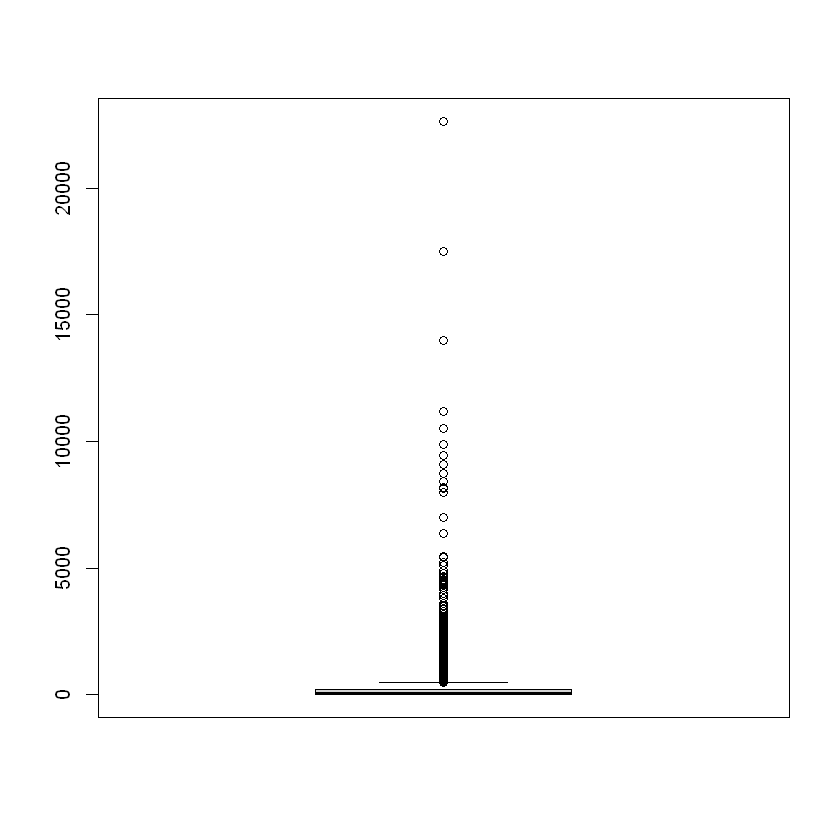

In [50]:
# let see the sales variable in more depth, how the data are concentrated
# outliers , and statistical values 
boxplot(x$sales)

In [52]:
median(x$sales,na.rm=TRUE)

[1] 54.376

In [54]:
summary(x$sales)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    0.444    17.248    54.376   229.803   209.880 22638.480         6 

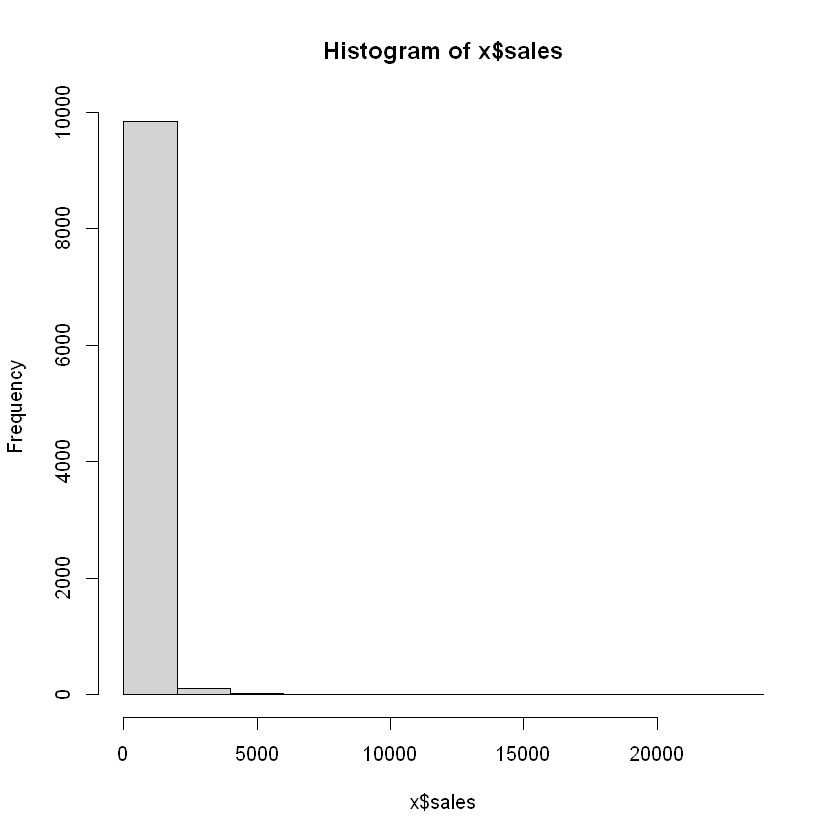

In [55]:
# there is lot diffrence between mean and median. that caused by outliers.
#the max data distributated 17 to 209 . hmmmmm.
#  let see the distribution how it is distributed 
hist(x$sales)

## Deep clean the data 

In [59]:
glimpse(x)

Rows: 9,994
Columns: 22
$ row_id        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ order_id      <chr> "CA-2016-152156", "CA-2016-152156", "CA-2016-138688", "U…
$ order_date    <chr> "11/8/2016", "11/8/2016", "6/12/2016", "10/11/2015", "10…
$ ship_date     <chr> "11/11/2016", "11/11/2016", "6/16/2016", "10/18/2015", "…
$ ship_mode     <chr> "Second Class", "Second Class", "Second Class", "Standar…
$ customer_id   <chr> "CG-12520", "CG-12520", "DV-13045", "SO-20335", "SO-2033…
$ customer_name <chr> "Claire Gute", "Claire Gute", "Darrin Van Huff", "Sean O…
$ segment       <chr> "Consumer", "Consumer", "Corporate", "Consumer", "Consum…
$ country       <chr> "United States", "United States", "United States", "Unit…
$ city          <chr> "Henderson", "Henderson", "Los Angeles", "Fort Lauderdal…
$ state         <chr> "Kentucky", "Kentucky", "California", "Florida", "Florid…
$ postal_code   <int> 42420, 42420, 90036, 33311, 33311, 90032, 90032, 90032, …
$ region        

In [62]:
# change ship_date < charecter to date type >
x$ship_date <- as.Date(x$ship_date)
print(paste("The new data typr of ship_date is :",class(x$ship_date)))

[1] "The new data typr of ship_date is : Date"


In [64]:
class(x$ship_mode)
# change ship_mode < character to factor >
x$ship_mode<- as.factor(x$ship_mode)
print(paste("The new data type of ship_mode is : ", class(x$ship_mode)))

[1] "character"

[1] "The new data type of ship_mode is :  factor"
